<a href="https://colab.research.google.com/github/crismunoz/Fuzzy-Logic/blob/master/FL_Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install  scikit-fuzzy

     |████████████████████████████████| 1.0MB 2.8MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-cp36-none-any.whl size=894070 sha256=7a548b35ecba38c65df74ec14b20e7424ebb995eb902b9c8448534372697627e
  Stored in directory: /root/.cache/pip/wheels/b9/4e/77/da79b16f64ef1738d95486e2731eea09d73e90a72465096600
Successfully built scikit-fuzzy


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Definição da variavel de entrada Continuidade

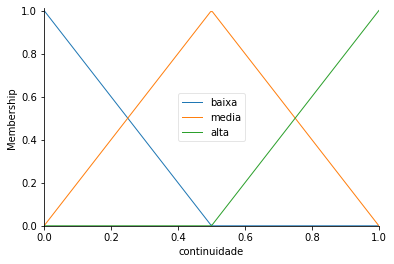

In [104]:
continuidade = ctrl.Antecedent(np.linspace(0, 1, 200), 'continuidade')
continuidade.automf(names=['baixa','media','alta'])
#continuidade['baixa'] = fuzz.trimf(continuidade.universe, [0, 0, 0.5])
#continuidade['media'] = fuzz.trimf(continuidade.universe, [0, 0.5, 1])
#continuidade['alta'] = fuzz.trimf(continuidade.universe, [0.5, 1, 1])
continuidade.view()

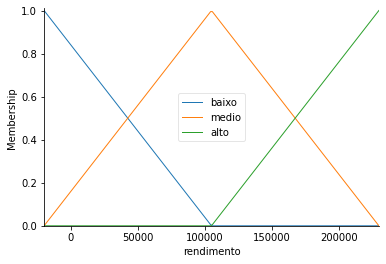

In [105]:
rendimento = ctrl.Antecedent(np.linspace(-20000, 230000, 200), 'rendimento')
rendimento.automf(names=['baixo','medio','alto'])
#rendimento['baixo'] = fuzz.trimf(rendimento.universe, [-20000, -20000, 50000])
#rendimento['medio'] = fuzz.trimf(rendimento.universe, [-20000, 50000, 150000])
#rendimento['alto'] = fuzz.trimf(rendimento.universe, [50000, 150000, 230000])
rendimento.view()

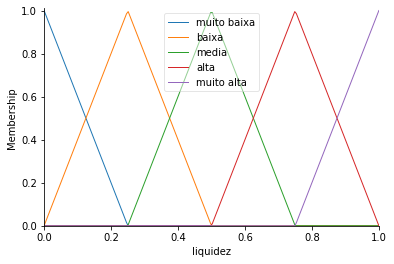

In [106]:
liquidez = ctrl.Consequent(np.linspace(0, 1, 200), 'liquidez')
liquidez.automf(names=['muito baixa','baixa','media','alta','muito alta'])
#liquidez['muito baixa'] = fuzz.trimf(liquidez.universe, [0, 0, 0.25])
#liquidez['baixa'] = fuzz.trimf(liquidez.universe, [0, 0.25, 0.5])
#liquidez['media'] = fuzz.trimf(liquidez.universe, [0.25, 0.5, 0.75])
#liquidez['alta'] = fuzz.trimf(liquidez.universe, [0.5, 0.75, 1])
#liquidez['muito alao'] = fuzz.trimf(liquidez.universe, [0.75, 1, 1])
liquidez.view()

In [111]:
rule1 = ctrl.Rule(                          rendimento['baixo']   , liquidez['muito baixa'])
rule2 = ctrl.Rule( continuidade['baixa']    & rendimento['medio'], liquidez['baixa'])
rule3 = ctrl.Rule( continuidade['media'] & rendimento['medio'], liquidez['media'])
rule4 = ctrl.Rule( continuidade['alta']   & rendimento['medio'], liquidez['alta'])
rule5 = ctrl.Rule( continuidade['baixa']    & rendimento['alto']  , liquidez['media'])
rule6 = ctrl.Rule( continuidade['media'] & rendimento['alto']  , liquidez['alta'])
rule7 = ctrl.Rule( continuidade['alta']   & rendimento['alto']  , liquidez['muito alta'])

system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7])
sim = ctrl.ControlSystemSimulation(system)

0.15190898366889977


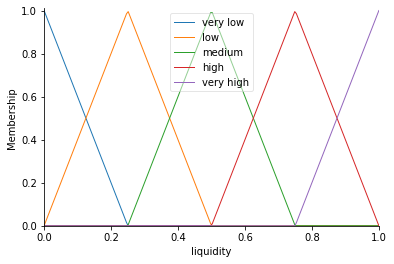

In [112]:
sim.input['continuidade'] = 0
sim.input['rendimento'] = 0
sim.compute()
print(sim.output['liquidez'])
liquidity.view(sim=sim)

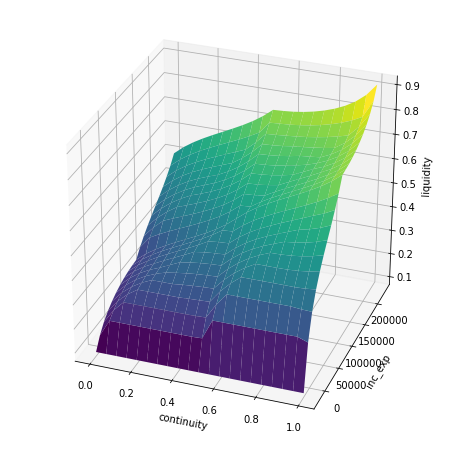

In [114]:
%matplotlib inline
# We can simulate at higher resolution with full accuracy
x_upsampled = np.linspace(0, 1, 21)
y_upsampled = np.linspace(-20000, 230000, 21)
x, y = np.meshgrid(x_upsampled, y_upsampled)
z = np.zeros_like(x)

# Loop through the system 21*21 times to collect the control surface
for i in range(21):
    for j in range(21):
        sim.input['continuidade'] = x[i, j]
        sim.input['rendimento'] = y[i, j]
        sim.compute()
        z[i, j] = sim.output['liquidez']

# Plot the result in pretty 3D with alpha blending
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Required for 3D plotting

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='viridis',
                       linewidth=0.4, antialiased=True)
ax.set_xlabel('continuity')
ax.set_ylabel('inc_exp')
ax.set_zlabel('liquidity')
ax.view_init(30, 290)
plt.show()